> Universidade Federal da Bahia

> Instituto de Matemática e Estatística

> Departamento de Ciência da Computação

> MATA60 - Banco de Dados

> Docente: Vaninha Vieira 

> Alunos: Angelmário Santana, Tassia Silva e Litiano Moura

> Data: 31 de Maio de 2018


>> ## Tema: Business Intelligence 
>> **RELATÓRIO DA ANÁLISE ESTATÍSTICA DA BASE DE DADOS SOBRE PEDIDOS DE ALIMENTOS REALIZADOS POR APLICATIVO NO 2° SEMESTRE DE 2016**.


### Introdução

   Nos últimos anos um mercado que vem chamando a atenção de investidores é o mercado de delivery, que está cada vez mais virando tendência entre os brasileiros. Segundo a Associação Brasileira de Bares e Restaurantes (ABRASEL) já em 2015, o mercado brasileiro movimentava 9 bilhões de reais por ano e em 2017 o faturamento passou dos 10 bilhões.

   Muitos estabelecimentos que tinham apenas espaços físicos, têm investido no serviço de delivery para atrair clientes e aumentar o faturamento. O SEBRAE reforça a preferência dos consumidores
por lugares que ofereçam entrega em domicílio, e afirma que 12%, segundo pesquisa realizada, não possuem nem loja física, e seguem trabalhando apenas com entregas inclusive por aplicativos.

   Muitos consumidores entrevistados afirmaram que pelo comodismo de não ter que enfrentar o trânsito pelas taxas de serviços e de estacionamento. Entre outras, faz mais sentido ir no aplicativo e escolher no cardápio e solicitar a entrega, além da facilidade de ver vários tipos de comida com apenas alguns cliques, tem atraído vários clientes mesmo havendo taxa de entrega. Ainda assim vale a pena conferir as ofertas oferecidas pelo comércio nos aplicativos, explica a pesquisa.
   
   Neste trabalho, foi nos concedido uma base de dados que mostra a respeito das entregas de alimentos em algumas cidades brasileiras com intuito de inferir informações a respeito e aplicar Business Intelligence.
   
### Analisando os dados por meio estatístico

   Após pesquisar sobre o assunto, foi realizada uma análise na base da equipe. Foi necessário analisar os atributos da base para entender o comportamento dos dados. A equipe  contou com ajuda do [Jupyter Notebook](http://jupyter.org/) que através de programação em Python nos ajudou a manipular os dados e desenvolver os gráficos que serão apresentados a seguir para construção do trabalho.



In [610]:
import numpy as np
import pandas as pd
import statsmodels as st
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table
from ipywidgets import widgets
import datetime

In [611]:
#Carregando a base de dados
base = pd.read_csv('aplicativo.csv')

- O primeiro passo foi observar a base de dados para obter uma visão geral dos atributos que existem na base.

In [612]:
#5 primeiros registros - Visão inicial dos dados
base.head(5)

,DATA_PEDIDO,HORA_PEDIDO,DIA_PEDIDO,VALOR_PRODUTOS,TAXA_ENTREGA,TOTAL_PEDIDO,FORMA_PAGAMENTO,AVALIACAO,STATUS,ID_ESTABELECIMENTO,TIPO_ESTABELECIMENTO,ID_USUARIO,DDD_USUARIO,DATA_CADASTRO_USUARIO,PRIMEIRO_PEDIDO,BAIRRO_USUARIO,CIDADE_USUARIO,SO_DISPOSITIVO
0,2016-07-05,19:51,Sunday,16.0,4.0,20.0,Dinheiro,NaN,Entregue,16,Lanchonete,50720,77,2016-07-05,Sim,Ipanema,Vitória da Conquista,Android
1,2016-07-05,20:58,Sunday,28.0,4.0,32.0,Dinheiro,NaN,Recusado,16,Lanchonete,48784,77,2016-06-18,Não,Candeias,Vitória da Conquista,iOS
2,2016-07-05,21:35,Sunday,13.0,4.0,17.0,Dinheiro,NaN,Recusado,16,Lanchonete,7016,77,2015-08-10,Não,Urbis I,Vitória da Conquista,Android
3,2016-07-06,23:22,Monday,11.5,4.0,15.5,Dinheiro,NaN,Entregue,16,Lanchonete,48536,77,2016-06-15,Não,Alto Maron,Vitória da Conquista,Android
4,2016-07-07,20:08,Tuesday,19.0,4.0,23.0,Dinheiro,NaN,Recusado,16,Lanchonete,21160,77,2015-12-21,Não,Candeias,Vitória da Conquista,Android


- Neste gráfico de Boxplot foi possível verificar alguns atributos e a sua distribuição no caso do “valor dos produtos”, “taxa de entrega” e do “total de pedidos”,  em que vimos a grande variedade entres as amostras coletadas, os valores discrepantes e a divisão dos dados quanto aos atributos mencionados.


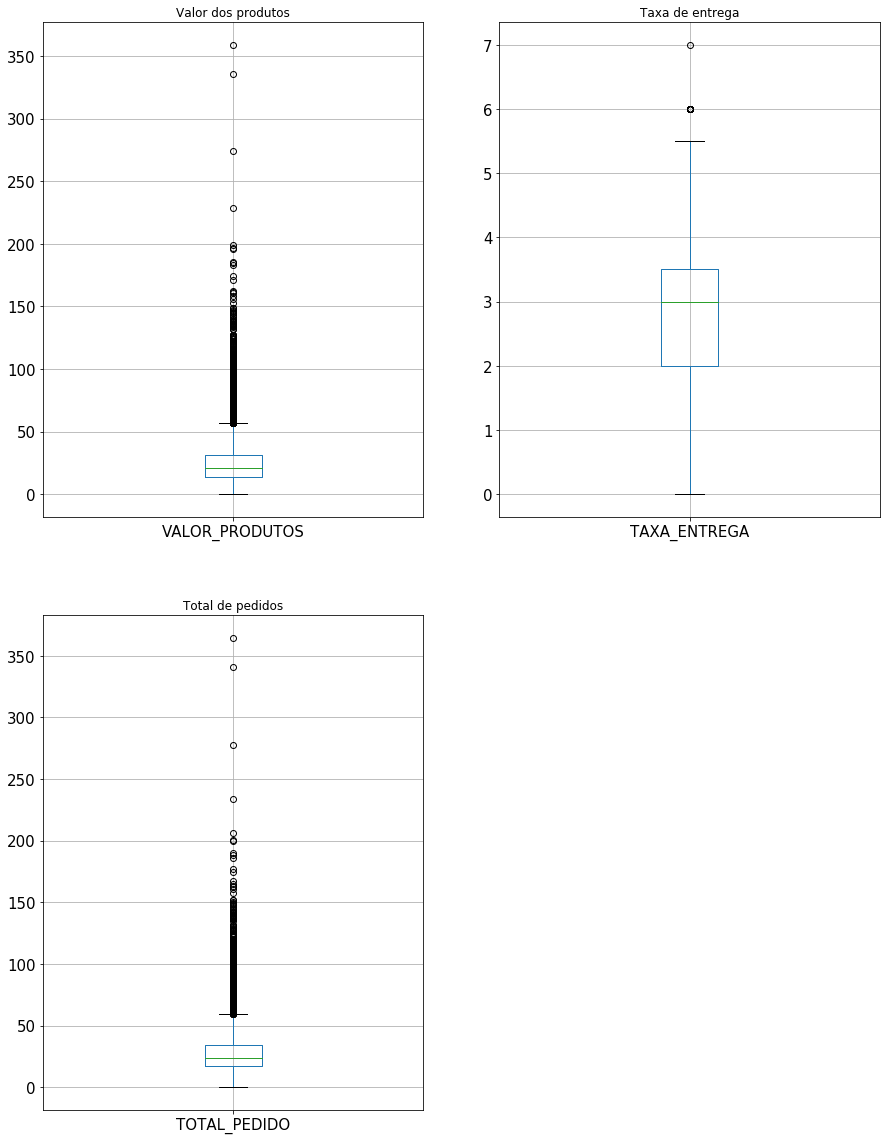

In [613]:
#Boxplot para verificar os valores discrepantes e a divisão dos dados
# do atributos mencionados
def boxplot_analise():
    fig = plt.figure(figsize=(15, 20))
    ax5 = fig.add_subplot(221)
    grafico = base[['VALOR_PRODUTOS']].boxplot(
        figsize=(20, 5), fontsize=fontsize, ax=ax5)
    plt.title('Valor dos produtos')

    ax6 = fig.add_subplot(222)
    grafico = base[['TAXA_ENTREGA']].boxplot(
        figsize=(20, 5), fontsize=fontsize, ax=ax6)
    plt.title('Taxa de entrega')

    ax7 = fig.add_subplot(223)
    grafico = base[['TOTAL_PEDIDO']].boxplot(
        figsize=(20, 5), fontsize=fontsize, ax=ax7)
    plt.title('Total de pedidos')


boxplot_analise()

In [614]:
# Formas de pagamentos e a respectiva quantidade,
# dado que o status do pedido é Recusado.

filt = base[(base['STATUS'] == "Recusado")]
dff = pd.DataFrame(filt.groupby('FORMA_PAGAMENTO').size())
dff.columns = ['Quantidade']
dff.sort_values(by=['Quantidade'], ascending=False)

,Quantidade
FORMA_PAGAMENTO,
Dinheiro,1030
Cartão,404


In [615]:
#Obter os tipos de estabelecimento e as suas respectivas quantidades
# da cidade de Vitória da Conquista.

filt = base[(base['CIDADE_USUARIO'] == "Vitória da Conquista")]
dff = pd.DataFrame(filt.groupby('TIPO_ESTABELECIMENTO').size())
dff.columns = ['Quantidade']
dff.sort_values(by=['Quantidade'], ascending=False)

,Quantidade
TIPO_ESTABELECIMENTO,
Lanchonete,7065
Pizzaria,3733
Marmitex,3491
Comida Natural,2128
Restaurante,1975
Comida Japonesa,1152
Pizzaria/Esfiharia,1075
Restaurante/Tapiocaria,573
Hot-Dog,450


- A tabela mostrou que referenciava dados sobre pedidos de alimentos realizados através de aplicativo para estabelecimentos, que atendiam por meio de delivery em que a coleta foi realizada no segundo semestre de 2016 de cidades brasileiras com enfoque no estado da Bahia, observando a discrepância, já que tivemos apenas um pedido em Sorocaba interior de São Paulo

In [616]:
#Obter as cidades do usuário e suas respectivas quantidades
# na base de dados

df = pd.DataFrame(base.groupby('CIDADE_USUARIO').size())
df.columns = ['Quantidade']
df
df.sort_values(by=['Quantidade'], ascending=False)

,Quantidade
CIDADE_USUARIO,
Vitória da Conquista,23889
Ibicaraí,103
Brumado,71
Mortugaba,35
Sorocaba,1


- Verificamos que pela quantidade de pedidos realizados sobre o estabelecimento, lanchonete recebeu a maior parte das vendas mesmo sendo bastante distribuído os dados referentes aos outros estabelecimentos.



In [617]:
df = pd.DataFrame(base.groupby('TIPO_ESTABELECIMENTO').size())
df.columns = ['Quantidade']
df
df.sort_values(by=['Quantidade'], ascending=False)

,Quantidade
TIPO_ESTABELECIMENTO,
Lanchonete,7187
Pizzaria,3763
Marmitex,3597
Comida Natural,2135
Restaurante,2006
Comida Japonesa,1167
Pizzaria/Esfiharia,1103
Restaurante/Tapiocaria,584
Pizzaria/Lanchonete,455


- Foi verificado também pelo gráfico que a maioria dos pedidos entregues foram pagos pela forma de pagamento em dinheiro. Mesmo assim, vimos que poucos pedidos foram recusados.

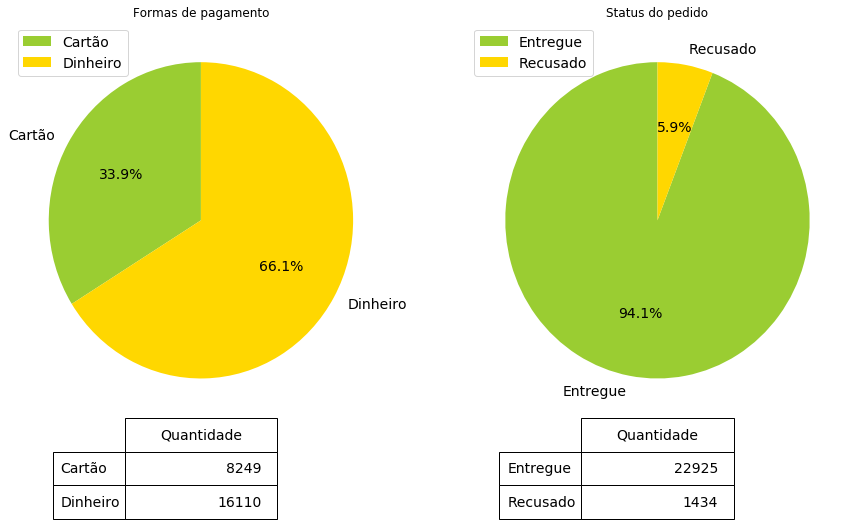

In [618]:
plt.rcParams.update({'text.color': 'black'})
fontsize = 14
font_size = 14
d1 = pd.DataFrame(base.groupby('FORMA_PAGAMENTO').size())
d1.columns = ['Quantidade']
fig = plt.figure(figsize=(15, 16))

colors = ['yellowgreen', 'gold']
# plot chart
ax1 = fig.add_subplot(221)
grafico = d1.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    shadow=False,
    figsize=(5, 5),
    fontsize=fontsize,
    colors=colors,
    legend=True,
    ax=ax1,
    subplots=True)
plt.title('Formas de pagamento')
plt.ylabel('')
plt.legend(loc=2, prop={'size': fontsize})

d2 = pd.DataFrame(base.groupby('STATUS').size())
d2.columns = ['Quantidade']

ax2 = fig.add_subplot(222)
grafico = d2.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    shadow=False,
    figsize=(5, 5),
    fontsize=fontsize,
    colors=colors,
    legend=True,
    ax=ax2,
    subplots=True)
plt.title('Status do pedido')
plt.ylabel('')
plt.legend(loc=2, prop={'size': fontsize})

#ax3 = fig.add_subplot(223)

#ax3.axis('off')
mpl_table = table(ax2, d2, loc='bottom', rowLoc='left', colLoc='center')
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
mpl_table.scale(0.4, 2.8)

#ax4 = fig.add_subplot(224)

#ax4.axis('off')
mpl_table = table(ax1, d1, loc='bottom', rowLoc='left', colLoc='center')
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
mpl_table.scale(0.4, 2.8)

- No gráficos de histograma, é possível através de atributos numéricos observar a distribuição na base de dados 


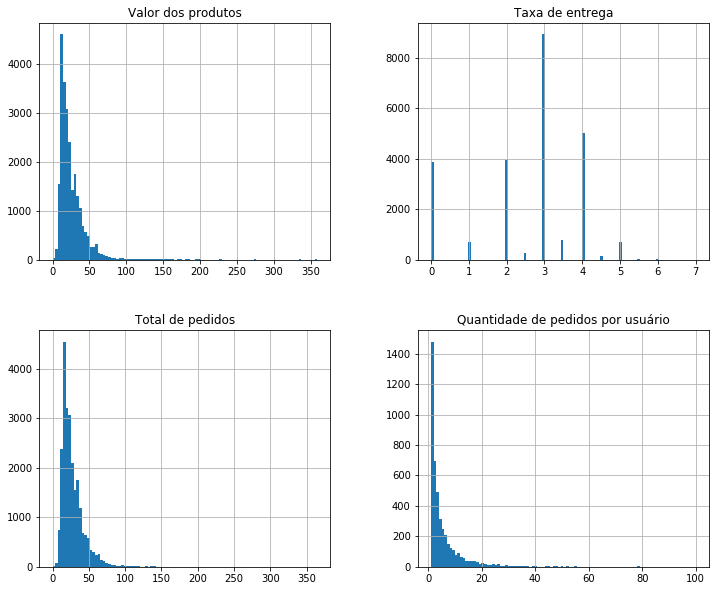

In [619]:
#Histograma dos atributos numéricos para
#observar a distribuição na base de dados.
def histograma_analise():
    fontsize = 15
    font_size = 15

    fig = plt.figure(figsize=(12, 10))
    ax5 = fig.add_subplot(221)
    base.hist(column='VALOR_PRODUTOS', bins=100, figsize=(20, 5), ax=ax5)
    plt.title('Valor dos produtos')

    ax6 = fig.add_subplot(222)
    base.hist(column='TAXA_ENTREGA', bins=100, figsize=(20, 5), ax=ax6)
    plt.title('Taxa de entrega')

    ax7 = fig.add_subplot(223)
    base.hist(column='TOTAL_PEDIDO', bins=100, figsize=(20, 5), ax=ax7)
    plt.title('Total de pedidos')

    dff = pd.DataFrame(base.groupby('ID_USUARIO').size())
    dff.columns = ['Quantidade']
    dff.sort_values(by=['Quantidade'], ascending=False)
    ax8 = fig.add_subplot(224)

    dff.hist(column='Quantidade', bins=100, figsize=(20, 5), ax=ax8)
    plt.title('Quantidade de pedidos por usuário')


histograma_analise()

## Pré-processamento

Para executar a etapa de pré-processamento, além da etapa de análise dos dados por meio estatístico, observamos os dados para verificar a existência dos seguintes itens:

1. Instâncias duplicadas;
1. Valores ausentes;
1. Valores inconsistentes;
1. Outliers.

Após essa verificação, executamos as etapas de pré-processamento.

### 1. Instâncias duplicadas

- Verificamos a quantidade de instâncias e atributos que a base possui:

In [620]:
#Verificar quantas instâncias (linhas) e quantos atributos (colunas) tem a base
base.shape

(24359, 18)

- Verificamos quantas instâncias duplicadas existem na base:

In [621]:
#Verificar quantas instâncias (linhas) duplicadas
base.duplicated().sum()

7

- Verificamos quais instâncias são duplicadas:

In [622]:
#Verificar quais são as instâncias duplicadas
base.loc[base.duplicated(keep = False), :]

,DATA_PEDIDO,HORA_PEDIDO,DIA_PEDIDO,VALOR_PRODUTOS,TAXA_ENTREGA,TOTAL_PEDIDO,FORMA_PAGAMENTO,AVALIACAO,STATUS,ID_ESTABELECIMENTO,TIPO_ESTABELECIMENTO,ID_USUARIO,DDD_USUARIO,DATA_CADASTRO_USUARIO,PRIMEIRO_PEDIDO,BAIRRO_USUARIO,CIDADE_USUARIO,SO_DISPOSITIVO
1679,2016-09-17,23:25,Thursday,10.0,2.0,12.0,Dinheiro,NaN,Entregue,168,Lanchonete,52376,77,2016-07-18,Não,Sumaré,Vitória da Conquista,Android
1680,2016-09-17,23:25,Thursday,10.0,2.0,12.0,Dinheiro,NaN,Entregue,168,Lanchonete,52376,77,2016-07-18,Não,Sumaré,Vitória da Conquista,Android
11793,2016-09-24,21:27,Thursday,0.0,3.0,0.0,Dinheiro,NaN,Recusado,936,Lanchonete,7592,77,2015-08-19,Não,Candeias,Vitória da Conquista,PC
11794,2016-09-24,21:27,Thursday,0.0,3.0,0.0,Dinheiro,NaN,Recusado,936,Lanchonete,7592,77,2015-08-19,Não,Candeias,Vitória da Conquista,PC
11795,2016-09-24,21:27,Thursday,0.0,3.0,0.0,Dinheiro,NaN,Recusado,936,Lanchonete,7592,77,2015-08-19,Não,Candeias,Vitória da Conquista,PC
11796,2016-09-24,21:27,Thursday,0.0,3.0,0.0,Dinheiro,NaN,Recusado,936,Lanchonete,7592,77,2015-08-19,Não,Candeias,Vitória da Conquista,PC
15616,2016-09-19,10:50,Saturday,12.0,2.0,14.0,Dinheiro,NaN,Entregue,1400,Marmitex,38936,73,2016-04-15,Não,Candeias,Vitória da Conquista,Android
15617,2016-09-19,10:50,Saturday,12.0,2.0,14.0,Dinheiro,NaN,Entregue,1400,Marmitex,38936,73,2016-04-15,Não,Candeias,Vitória da Conquista,Android
23685,2016-09-27,16:36,Sunday,16.0,4.0,20.0,Cartão,NaN,Recusado,640,Comida Natural,7000,77,2015-08-09,Não,Universidade,Vitória da Conquista,PC
23686,2016-09-27,16:36,Sunday,16.0,4.0,20.0,Cartão,NaN,Recusado,640,Comida Natural,7000,77,2015-08-09,Não,Universidade,Vitória da Conquista,PC


- Por se tratar de poucas instâncias duplicadas, foi decidido remover as mesmas:

In [623]:
novaBase = base.drop_duplicates(keep="first")

- Quantidade de instâncias após remoção:

In [624]:
novaBase.shape

(24352, 18)

### 2. Valores ausentes
- Verificamos quantos valores ausentes e de quais atributos são:

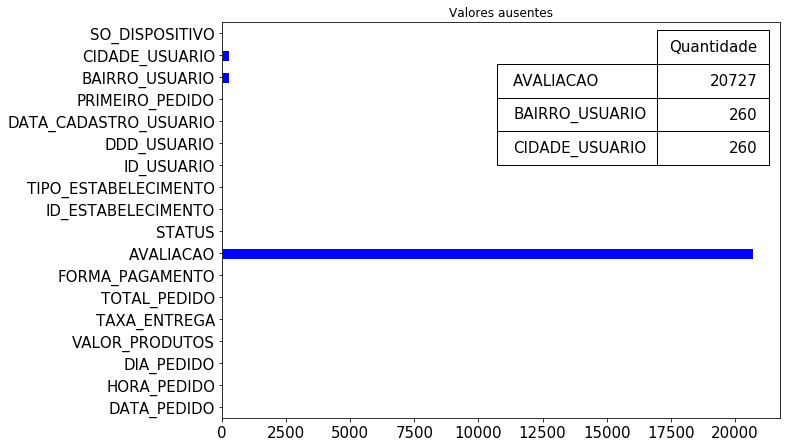

In [625]:
#Gráfico que exibe a quantidade valores ausentes
#para cada atributo da base

fontsize = 15
font_size = 15
df = pd.DataFrame(novaBase.isnull().sum())

df.columns = ['Quantidade']
ax8 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
grafico = df.plot.barh(
    figsize=(10, 16),
    fontsize=fontsize,
    ax=ax8,
    facecolor='blue',
    edgecolor='white',
    legend=False)
plt.title('Valores ausentes')

df = df[(df['Quantidade'] > 0)]
df
mpl_table = table(ax8, df, loc='best', rowLoc='left', colLoc='center')
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
mpl_table.scale(0.2, 2.8)

- Verificamos se as 260 instâncias de valor ausente para o atributo **CIDADE_USUARIO** são as mesmas para o **BAIRRO_USUARIO**, e vice-versa:

In [626]:
#(linha, coluna)
novaBase[novaBase['CIDADE_USUARIO'].isnull()
         & novaBase['BAIRRO_USUARIO'].isnull()].shape

(260, 18)

- Após observar a quantidade de valores ausentes e confirmar que o atributo **CIDADE_USUARIO** e **BAIRRO_USUARIO** estão correlacionados, foi decidido remover as instâncias que não contém valor para o atributo **CIDADE_USUARIO** e **BAIRRO_USUARIO**, por causa da sua baixa quantidade em relação a de instâncias da base:

In [627]:
novaBase = novaBase.dropna(
    subset=['CIDADE_USUARIO', 'BAIRRO_USUARIO'], how='all')

- Após remover as 260 instâncias, referentes aos valores ausentes **CIDADE_USUARIO** e **BAIRRO_USUARIO**, a base passou a ter 24092 linhas:

In [628]:
novaBase.shape

(24092, 18)

- Antes de decidir o que fazer com o valores ausentes do atributo **AVALIACAO**, decidimos observar quais ocorrências para o mesmo e a quantidade:

In [629]:
def listar_ocorrencias_avaliacao(df):
    r = pd.DataFrame(df['AVALIACAO'].value_counts(dropna=False))
    r.columns = ['Quantidade']
    total = r['Quantidade'].sum()
    r['%'] = r['Quantidade'].apply(lambda x: (x / total))
    return r


listar_ocorrencias_avaliacao(novaBase)

,Quantidade,%
NaN,20503,0.851029
5.0,2037,0.084551
4.0,580,0.024074
1.0,531,0.022041
3.0,290,0.012037
2.0,151,0.006268


- Observando que 85% das instâncias que possuem valores ausentes para o atributo **AVALIACAO**, a remoção dessas linhas não é uma opção. Como não podemos remover, decidimos atribuir o valor "0.0" para os valores ausentes do atributo **AVALIACAO**. A decisão se tornou mais consistente, porque o atributo **AVALIACAO**, mesmo sendo numérico, possui 5 valores  (1.0, 2.0, 3.0, 4.0 e 5.0) bem separados e sequênciais. Com isso, inferimos que os valores ausentes seriam o valor "0.0":

In [630]:
novaBase['AVALIACAO'].fillna(0.0, inplace=True)
listar_ocorrencias_avaliacao(novaBase)

,Quantidade,%
0.0,20503,0.851029
5.0,2037,0.084551
4.0,580,0.024074
1.0,531,0.022041
3.0,290,0.012037
2.0,151,0.006268


### 3. Valores inconsistentes
- Foi verificado se o atributo **DIA_PEDIDO** confere com a dia do atributo **DATA_PEDIDO**. Para isso utilizamos uma função da linguagem python, que informando a data, a mesma retorna o dia da semana:

In [631]:
#Verificando se a Data do pedido informada na base,
# confere com o Dia do pedido informado.

df = novaBase.loc[:, ['DATA_PEDIDO', 'DIA_PEDIDO']]

df['Dia do pedido (Verificado pela função)'] = pd.DataFrame(
    df.apply(
        lambda x: datetime.datetime.strptime(x['DATA_PEDIDO'], '%Y-%m-%d')
        .strftime('%A'),
        axis=1))

df.head(10)

,DATA_PEDIDO,DIA_PEDIDO,Dia do pedido (Verificado pela função)
0,2016-07-05,Sunday,Tuesday
1,2016-07-05,Sunday,Tuesday
2,2016-07-05,Sunday,Tuesday
3,2016-07-06,Monday,Wednesday
4,2016-07-07,Tuesday,Thursday
5,2016-07-08,Wednesday,Friday
6,2016-07-09,Thursday,Saturday
7,2016-07-10,Friday,Sunday
8,2016-07-12,Sunday,Tuesday
9,2016-07-15,Wednesday,Friday


- Verificamos se existia alguma instância na base de dados, em que o dia do pedido verificado pela função era igual do atributo **DIA_PEDIDO**:

In [632]:
filtrado = df1[(
    df1['DIA_PEDIDO'] == df1['Dia do pedido (Verificado pela função)'])]
len(filtrado)

0

- Devido a verificação, decidimos remover o atributo **DIA_PEDIDO**:

In [633]:
novaBase = novaBase.drop(columns=['DIA_PEDIDO'])

- A base de dados passou a ter 17 atributos:

In [634]:
novaBase.shape

(24092, 17)

- Observamos que para o atributo **TOTAL_PEDIDO**, é dado pela soma de **VALOR_PRODUTOS** e a **TAXA_ENTREGA**. Adicionamos o atributo **STATUS** para efetuar outra verificação posteriormente, com isso resolvemos verificar nossa hipótese:

In [635]:
df = novaBase.loc[:,
                  ['VALOR_PRODUTOS', 'TAXA_ENTREGA', 'TOTAL_PEDIDO', 'STATUS']]
df['Total pedido (Verificado)'] = pd.DataFrame(
    df.apply(lambda x: (x['VALOR_PRODUTOS'] + x['TAXA_ENTREGA']), axis=1))

df.head(10)

,VALOR_PRODUTOS,TAXA_ENTREGA,TOTAL_PEDIDO,STATUS,Total pedido (Verificado)
0,16.0,4.0,20.0,Entregue,20.0
1,28.0,4.0,32.0,Recusado,32.0
2,13.0,4.0,17.0,Recusado,17.0
3,11.5,4.0,15.5,Entregue,15.5
4,19.0,4.0,23.0,Recusado,23.0
5,42.0,4.0,46.0,Recusado,46.0
6,9.0,4.0,13.0,Recusado,13.0
7,29.0,4.0,33.0,Entregue,33.0
8,32.0,4.0,36.0,Entregue,36.0
9,12.0,4.0,16.0,Recusado,16.0


- Verificamos se existe alguém fora dessa regra:

In [636]:
filtrado_diferente = df[np.isclose(df['TOTAL_PEDIDO'], df[
    'Total pedido (Verificado)']) == False]
len(filtrado_diferente)

5

- Pela verificação anterior, queremos saber se a diferença foi para mais ou para menos em relação ao **Total pedido (Verificado)**. Primeiro verificamos para mais:

In [637]:
filtrado_para_mais = filtrado_diferente[(
    filtrado_diferente['TOTAL_PEDIDO'] >
    filtrado_diferente['Total pedido (Verificado)'])]
len(filtrado_para_mais)

0

- Segundo verificamos para menos:

In [638]:
filtrado_para_menos = filtrado_diferente[(
    filtrado_diferente['TOTAL_PEDIDO'] <
    filtrado_diferente['Total pedido (Verificado)'])]
recusados_esperado = len(filtrado_para_menos)
recusados_esperado

5

- Inferimos que para um pedido/instância, que tem como valor do atributo **TOTAL_PEDIDO** inferior ao  **Total pedido (Verificado)**, o **STATUS** do pedido deveria ser **Recusado**. Verificamos:

In [639]:
recusados = filtrado_para_menos[(filtrado_para_menos['STATUS'] == 'Recusado')]
len(recusados)

4

In [640]:
recusados

,VALOR_PRODUTOS,TAXA_ENTREGA,TOTAL_PEDIDO,STATUS,Total pedido (Verificado)
11793,0.0,3.0,0.0,Recusado,3.0
11804,0.0,3.0,0.0,Recusado,3.0
11805,0.0,3.0,0.0,Recusado,3.0
19900,0.0,4.0,0.0,Recusado,4.0


- Pela execução anterior, observamos que existe uma instância com o atributo **STATUS** igual a **Entregue** e o **TOTAL_PEDIDO** menor do que o **Total pedido (Verificado)**:

In [641]:
entregue = filtrado_para_menos[(filtrado_para_menos['STATUS'] == 'Entregue')]
len(entregue)

1

In [642]:
entregue

,VALOR_PRODUTOS,TAXA_ENTREGA,TOTAL_PEDIDO,STATUS,Total pedido (Verificado)
22722,27.9,1.99,6.89,Entregue,29.89


- Podemos considerar essa instância com valor inconsistente, portanto, decidimos remover a mesma da base de dados:

In [643]:
i = entregue.index
novaBase = novaBase.drop(i)
novaBase.shape

(24091, 17)

### 4. Outliers
- Utilizando a visualização e a análise do gráfico **boxplot** exibido neste relatório, observamos que existem outliers nos valores dos atributos **VALOR_PRODUTOS** e **TOTAL_PEDIDOS**:

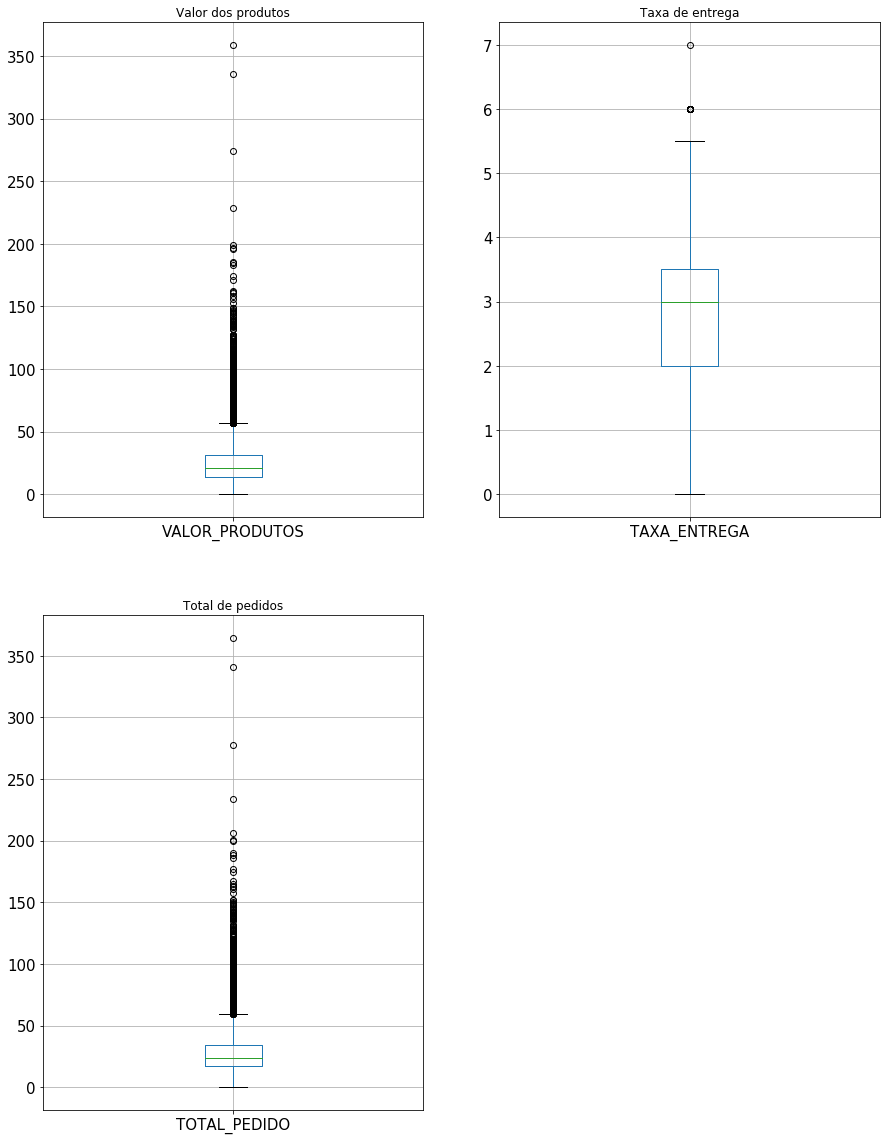

In [644]:
boxplot_analise()

- Decidimos fazer a eliminação de valores acima de 60, tanto para o atributo **VALOR_PRODUTOS** e **TOTAL_PEDIDO**, com base no gráfico:

In [645]:
def remover_outliers(novaBase, valor):
    return novaBase.drop(novaBase[(novaBase['VALOR_PRODUTOS'] > valor)
                                  & (novaBase['TOTAL_PEDIDO'] > valor)].index)


novaBase = remover_outliers(novaBase, 60)

In [646]:
novaBase.shape

(23297, 17)

- Verificamos se nos **boxplot** existem ainda outliers:

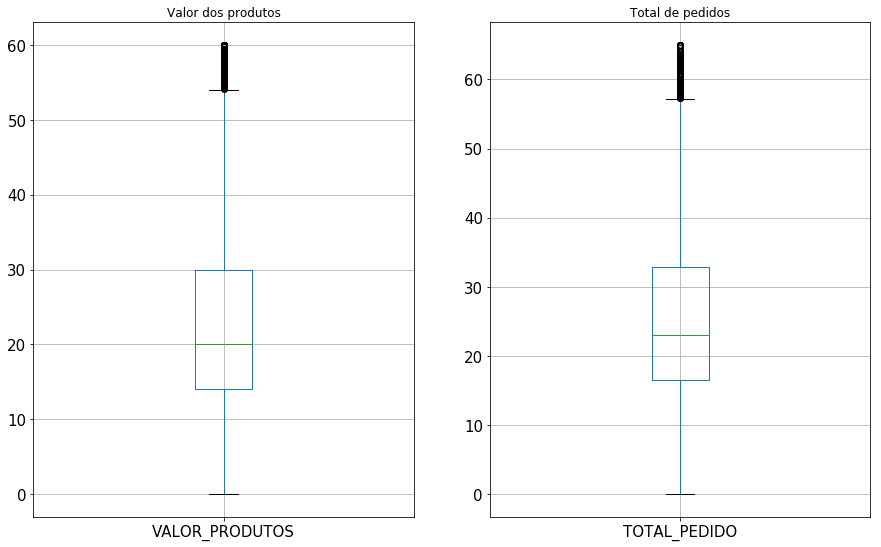

In [647]:
def boxplot_novaBase(novaBase):
    fig = plt.figure(figsize=(15, 20))
    ax5 = fig.add_subplot(221)
    grafico = novaBase[['VALOR_PRODUTOS']].boxplot(
        figsize=(20, 5), fontsize=fontsize, ax=ax5)
    plt.title('Valor dos produtos')

    ax7 = fig.add_subplot(222)
    grafico = novaBase[['TOTAL_PEDIDO']].boxplot(
        figsize=(20, 5), fontsize=fontsize, ax=ax7)
    plt.title('Total de pedidos')


boxplot_novaBase(novaBase)

- Decidimos fazer novamente a eliminação de valores acima de 55, tanto para o atributo **VALOR_PRODUTOS** e **TOTAL_PEDIDO**, com base no gráfico acima:

In [648]:
novaBase = remover_outliers(novaBase, 55)

In [649]:
novaBase.shape

(22908, 17)

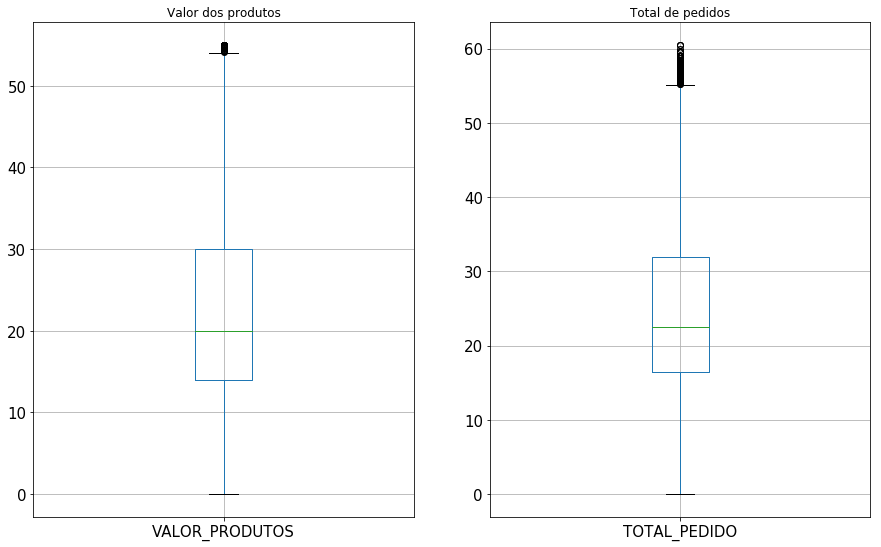

In [650]:
boxplot_novaBase(novaBase)

- Novamente a eliminação de valores acima de 55, apenas para o atributo **TOTAL_PEDIDO**, com base no gráfico acima:

In [651]:
def remover_outliers_total_pedido(novaBase, valor):
    return novaBase.drop(novaBase[(novaBase['TOTAL_PEDIDO'] > valor)].index)


novaBase = remover_outliers_total_pedido(novaBase, 55)

In [652]:
novaBase.shape

(22676, 17)

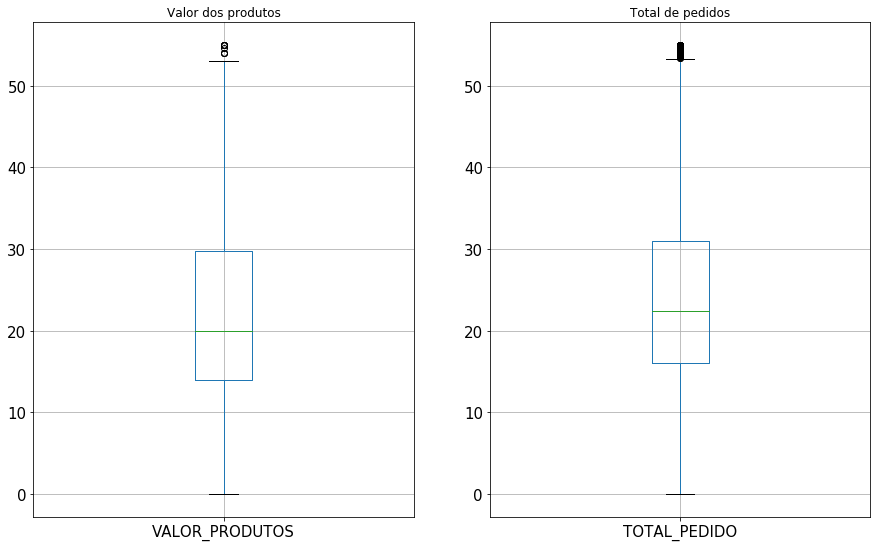

In [653]:
boxplot_novaBase(novaBase)

- Outra vez a eliminação considerando valores acima de 52, tanto para o atributo **VALOR_PRODUTOS** e **TOTAL_PEDIDO**, logo em seguida apenas para **TOTAL_PEDIDO**, com base no gráfico acima:

In [654]:
novaBase = remover_outliers(novaBase, 52)
novaBase = remover_outliers_total_pedido(novaBase, 52)

In [655]:
novaBase.shape

(22429, 17)

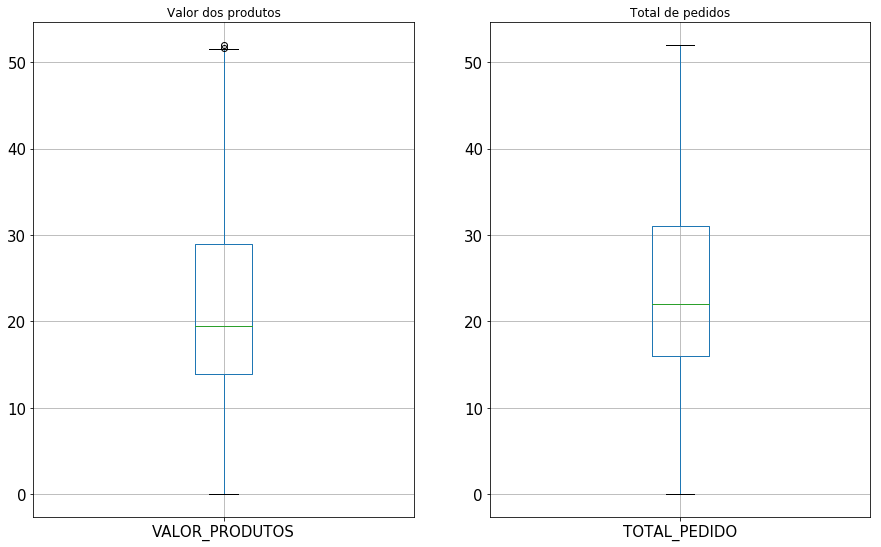

In [656]:
boxplot_novaBase(novaBase)

- A remoção foi satisfatória, não é preciso remover mais. Portanto, após a execução do pré-processamento ainda possuímos,boa quantidade de dados:

In [657]:
novaBase.shape

(22429, 17)

- Após executar o pré-processamento, temos a base pré-processada:

In [658]:
novaBase.to_csv('base_pre_processada_aplicativo.csv')